<a href="https://colab.research.google.com/github/georgeragan/FASHIOB-MNIST/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPENDENCIES

In [4]:
import random
random.seed(0)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras import layers, models,datasets


SPLITTING DATA INTO TEST AND TRAIN

In [5]:
(X_train,Y_train),(X_test,Y_test)=datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
print(X_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [10]:
print(Y_train[0])

9


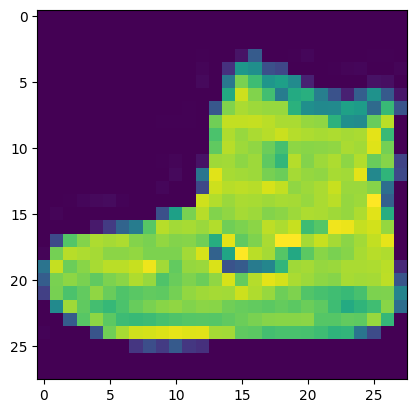

In [12]:
image=plt.imshow(X_train[0])
plt.show()

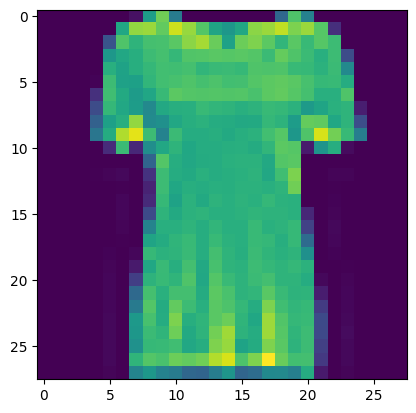

In [15]:
image=plt.imshow(X_train[10])
plt.show()

In [13]:
#image labels whether unique or not
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


NORMALISATION

In [14]:
X_train=X_train/255
X_test=X_test/255

BUILDING NEURAL NETWORK

In [16]:
#convolution layer
model=models.Sequential()#to stack layer one top of the other.series of connection and adding layer
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#32--kernels to detect several features like shape,edjes etc.and filter is (3,3) and model can understand certian features of image
model.add(layers.MaxPooling2D((2,2)))#to reduce spacial information
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


#adding dense layer(top layer)
model.add(layers.Flatten())#to convert 2d to 1d
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))



In [17]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

MODEL TRAINING AND ACCURACY ON TRAINING DATA

In [18]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)
#loss=truevalue-predicted value
#EPOCH-HOW MAY TIMES SHOULD NEURAL NETWORK GO THROUGH THE DATA.EACH TIME IT CHANGES ITS PARAMETERS AND IT GIVES ACCURACY

Epoch 1/10
1688/1688 [==============================] - 57s 33ms/step - loss: 0.5034 - acc: 0.8175 - val_loss: 0.3764 - val_acc: 0.8622
Epoch 2/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.3284 - acc: 0.8807 - val_loss: 0.3201 - val_acc: 0.8803
Epoch 3/10
1688/1688 [==============================] - 63s 37ms/step - loss: 0.2798 - acc: 0.8981 - val_loss: 0.2822 - val_acc: 0.8965
Epoch 4/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2492 - acc: 0.9089 - val_loss: 0.2729 - val_acc: 0.9042
Epoch 5/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2253 - acc: 0.9163 - val_loss: 0.2683 - val_acc: 0.9028
Epoch 6/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2033 - acc: 0.9243 - val_loss: 0.2616 - val_acc: 0.9070
Epoch 7/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.1866 - acc: 0.9289 - val_loss: 0.2743 - val_acc: 0.9048
Epoch 8/10
1688/1688 [==========================

EVALAUTION IN TRAINING

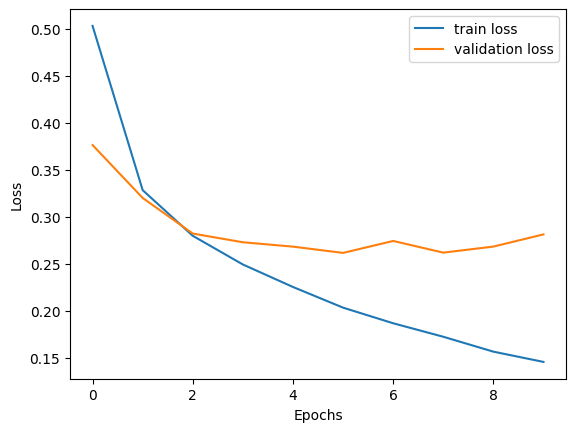

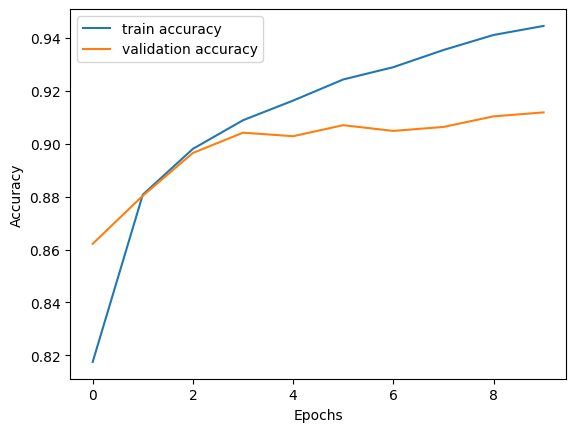

In [20]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

ACCURACY ON TEST DATA

In [21]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.2875 - acc: 0.9081
Test Accuracy = 0.9081000089645386


SAVING MODEL

In [22]:
model.save('fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
